# Les fonctions Python et les fonctions mathématiques

On étudie ici les différences fondamentales entre les représentations numériques (en particulier dans le langage Python) et les représentations formelles des fonctions. On discute essentiellement de la différence entre variable et paramètre dans les représentations formelles, et comment conserver ces différences conceptuelles en utilisant les attributs et méthodes de classe dans Python. 

## Fonction Python

Une fonction Python est une simple suite d'instructions qui retourne un résultat (ou un objet) lors de son appel. Une fonction Python prend en entrée un ou plusieurs **paramètres**. Par exemple

In [1]:
def twice(x):
    return x + x

retourne le double de l'objet `x`. L'opération `+` de Python ne doit pas être confondu avec l'addition comme définie par les mathématiques. On peut définir toute sorte d'objets qui pourraient être ajoutés. Par exemple

In [2]:
twice(2), twice(5)

(4, 10)

In [3]:
twice('ah bon ! ')

'ah bon ! ah bon ! '

montre que la somme de deux chaînes de caractères existe pour Python, alors que cet objet n'est pas clairement défini mathématiquement ... 

```{admonition} Python et le typage des données
:class: note
L'exemple de la fonction `twice` ci-dessus illustre parfaitement le fort typage du langage Python. Il n'est pas possible d'y faire du sur-classage (donner le même nom à plusieurs fonctions, qui seront choisies en fonction du type du paramètre d'entrée) mais chaque objet possède un type très défini. Les fonctions de base peuvent en revanche être masquées par typage, comme dans tout langage orienté objet.
```

## Fonction mathématique

Une fonction mathématique met en regard deux valeurs (typiquement ces valeurs sont des nombres entiers, des réels, des vecteurs, des matrices, ... mais dans tous les cas ce sont des objets mathématiques) sous la forme canonique

$$f: \; X \longmapsto Y,\;\; x \longrightarrow y$$

où $X$ et $Y$ sont les ensembles de départ et d'arrivée (typiquement les ensembles des entiers, des réels, des vecteurs, des matrices, ...), respectivement, et $x$ et $y$ les variables mises en correspondances. 

Construire une fonction informatique à partir d'une fonction mathématique semble une abstraction simple dans les cas simples justement. Par exemple on a construit la fonction `twice` pour les entiers qui pourrait se représenter mathématiquement comme 

$$f: \; \mathbb{N} \longmapsto \mathbb{N}, \;\; x \longrightarrow x+x$$

et que l'on note plus simplement

$$f\left(x\right) = x+x$$

Il existe néanmoins des cas bien moins évidents. Regardons par exemple la [fonction gaussienne](https://fr.wikipedia.org/wiki/Fonction_gaussienne) qui se définit comme 

$$f\left(x\right) = \frac{1}{\sigma \sqrt{2\,\pi}}\, \mathrm{e}^{-\frac{\left(x-\mu\right)^2}{2\sigma^2}}$$

où $\mu$ et $\sigma$ sont des **paramètres**, tandis que $x$ est la **variable** de la fonction, tandis que $\pi$ est la constante mathématique qui possède une infinité de chiffres significatifs, et qui n'a aucune représentation finie dans l'espace des réels $\mathbb{R}$.

Se pose alors la question de la représentation de cette fonction en Python.

### Représentation classique

On peut évidemment utiliser une représentation assez classique qui consiste _à transformer tous les paramètres en variables_ sous la forme

In [4]:
from math import pi, exp, sqrt

def gaussian(x, mu, sigma):
    numerator = exp(-(x-mu)**2 / 2 / sigma**2)
    denominator = sigma * sqrt(2*pi)
    return numerator / denominator

où on a utilisé les fonctions de base de la [librairie standard `math`](https://docs.python.org/3/library/math.html) par commodité. 

On peut maintenant appeler cette fonction pour plusieurs valeur de `x` et tracer la fonction correspondante. On utilise pour cela des [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) dans la teminologie Python.

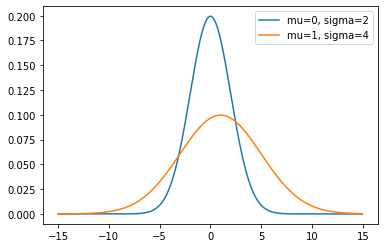

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# toutes les ordonnées
X = [x/100 for x in range(-1500,1500,4)]

# instanciation des paramètres
mu, sigma = 0, 2
# calcul de toutes les valeurs
gaussian02 = [gaussian(x, mu, sigma) for x in X]
g02, = ax.plot(X, gaussian02, label=f'mu={mu}, sigma={sigma}')

# nouvelle instanciation des paramètres
mu, sigma = 1, 4
# calcul de toutes les valeurs
gaussian14 = [gaussian(x, mu, sigma) for x in X]
g14, = ax.plot(X, gaussian14, label=f'mu={mu}, sigma={sigma}')

ax.legend(handles=[g02, g14])

plt.show()
fig.clf() # supprime les figures de la mémoire

On voit qu'à chaque appel de la fonction `gaussian(x, mu, sigma)`, il faut rappeler les paramètres $\mu$ et $\sigma$. De même, il n'y a plus de distinction claire entre les paramètres $\mu$ et $\sigma$ et la variable $x$.

### Représentation sous forme de classe fonctionnelle

Une approche permettant de préserver la structure claire de paramètres et de variables mathématiques consiste à utiliser des objets Python. Comme les objets ont des attributs et des méthodes, il s'agit de définir tous les paramètres de la fonction mathématique comme des attributs de l'objet informatique, et de n'utiliser la variable qu'à l'appel d'une méthode particulière (par exemple la méthode `get`). 

Il se trouve néanmoins que Python possède une belle collection de [méthodes spéciales](https://docs.python.org/3/reference/datamodel.html#special-method-names) appelées _dunder method_ parce qu'elles ont des doubles tirets-du-8 autour de leur nom (_double underscores_ = _dunder_). Parmis ces méthodes spéciales, dont la fonction `__init__` qui définit l'instanciation de la classe, se trouve la fonction [`__call__`](https://docs.python.org/3/reference/datamodel.html#emulating-callable-objects) qui permet de rendre appelable (_callable_) l'instance de la classe. 

Dans notre cas, la stratégie est de créer une class `Gaussian` qui va avoir deux attributs/paramètres `mu` et `sigma`, et implémenter la méthode spéciale `__call__` prenant pour paramètre la variable `x`. La fonction `gaussian01` ayant pour paramètres $\mu = 0$ et $\sigma = 1$ va alors s'instancier sous la forme `gaussian01 = Gaussian(mu=0, sigma=1)` et préserver les différences fondamentales entre les paramètres et la variable $x$. Appeler la fonction `gaussian(x=0.0)` pour un `x` donné va alors renvoyer la valeur de la gaussienne de paramètres $\mu = 0$ et $\sigma = 1$ au poit $x=0$. 

In [6]:
class Gaussian():
    
    def __init__(self, mu=0, sigma=1):
        self.mu = mu
        self.sigma = sigma
        return None 
    
    def __call__(self, x):
        numerator = exp(-(x-self.mu)**2 / 2 / self.sigma**2)
        denominator = self.sigma * sqrt(2*pi)
        return numerator / denominator        

Les courbes obtenues ci-dessus s'obtiennent dans cette nouvelle représentation : 

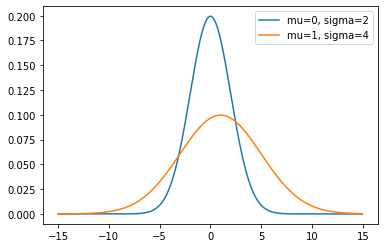

In [7]:
fig, ax = plt.subplots()
# toutes les ordonnées
X = [x/100 for x in range(-1500,1500,4)]

# instanciation de la Gaussienne, avec ses paramètres
gaussian02 = Gaussian(mu=0, sigma=2)

# calcul de toutes les valeurs
gaussian02_values = [gaussian02(x) for x in X]
g02, = ax.plot(X, gaussian02_values, 
               label=f'mu={gaussian02.mu}, sigma={gaussian02.sigma}')

# instanciation d'une nouvelle Gaussienne, avec ses nouveaux paramètres
gaussian14 = Gaussian(mu=1, sigma=4)

gaussian14_values = [gaussian14(x) for x in X]
g14, = ax.plot(X, gaussian14_values, 
               label=f'mu={gaussian14.mu}, sigma={gaussian14.sigma}')

ax.legend(handles=[g02, g14])

plt.show()
fig.clf()

Pour bien distinguer paramètres et variables, on préfèrera utiliser cette deuxième représentation des fonctions mathématiques. 